<a href="https://colab.research.google.com/github/castimax/media-tester/blob/master/actividad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -r /content/drive/MyDrive/CLASES/UNIR/PYTHON/TRABAJOS/ACT2/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Probar el acceso al archivo 4ogq.cif
with open('/content/drive/MyDrive/CLASES/UNIR/PYTHON/TRABAJOS/ACT2/4ogq.cif', 'r') as file:
    print(file.readline())


data_4OGQ



#
A. Descargar archivos .cif (2,5 puntos)

In [ ]:
import requests

def descargar_cif(ids):
    url_base = "https://files.rcsb.org/download/"
    for id in ids:
        url = f"{url_base}{id}.cif"
        try:
            response = requests.get(url)
            if response.status_code == 200:
                with open(f"{id}.cif", 'wb') as file:
                    file.write(response.content)
                print(f"Descargado: {id}.cif")
            else:
                print(f"Error de descarga: {id}, Status: {response.status_code}")
        except Exception as e:
            print(f"Excepción al descargar {id}: {str(e)}")

ids_proteinas = ['1tup', '2xyz', '3def', '4ogq', '5jkl', '6mno', '7pqr', '8stu', '9vwx', '10yza']
descargar_cif(ids_proteinas)

Descargado: 1tup.cif
Descargado: 2xyz.cif
Descargado: 3def.cif
Descargado: 4ogq.cif
Descargado: 5jkl.cif
Descargado: 6mno.cif
Descargado: 7pqr.cif
Descargado: 8stu.cif
Error de descarga: 9vwx, Status: 404
Error de descarga: 10yza, Status: 404


# B. Obtener información de UniProt (2,5 puntos)

### A) Código de control de url

In [ ]:
url = f"https://rest.uniprot.org/uniprotkb/search?query=1tup&format=tsv&fields=accession,id"
response = requests.get(url)
print("URL:", url)
print("Respuesta de la primera solicitud:", response.text)


URL: https://rest.uniprot.org/uniprotkb/search?query=1tup&format=tsv&fields=accession,id
Respuesta de la primera solicitud: Entry	Entry Name
P16649	TUP1_YEAST
P0CY34	TUP1_CANAL
O76734	TUP1_DICDI
P56094	TUP1_KLULA
C4YFX2	TUP1_CANAW
P04637	P53_HUMAN



### B) Prueba de query a la url

In [ ]:
if len(response.text.split("\n")) > 1 and len(response.text.split("\n")[1]) > 0:
    uniprot_id = response.text.split("\n")[1].split("\t")[0]
    entry_url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.txt"
    response = requests.get(entry_url)
    print("URL de la entrada:", entry_url)
    print("Respuesta de la segunda solicitud:", response.text)
else:
    print("No se encontró un ID de UniProt asociado.")


URL de la entrada: https://rest.uniprot.org/uniprotkb/P16649.txt
Respuesta de la segunda solicitud: ID   TUP1_YEAST              Reviewed;         713 AA.
AC   P16649; D6VR85; P17995; P18323;
DT   01-AUG-1990, integrated into UniProtKB/Swiss-Prot.
DT   01-MAY-1991, sequence version 2.
DT   27-MAR-2024, entry version 234.
DE   RecName: Full=General transcriptional corepressor TUP1;
DE   AltName: Full=Flocculation suppressor protein;
DE   AltName: Full=Glucose repression regulatory protein TUP1;
DE   AltName: Full=Repressor AER2;
GN   Name=TUP1; Synonyms=AAR1, AER2, AMM1, CYC9, FLK1, SFL2, UMR7;
GN   OrderedLocusNames=YCR084C; ORFNames=YCR84C;
OS   Saccharomyces cerevisiae (strain ATCC 204508 / S288c) (Baker's yeast).
OC   Eukaryota; Fungi; Dikarya; Ascomycota; Saccharomycotina; Saccharomycetes;
OC   Saccharomycetales; Saccharomycetaceae; Saccharomyces.
OX   NCBI_TaxID=559292;
RN   [1]
RP   NUCLEOTIDE SEQUENCE [GENOMIC DNA], AND FUNCTION.
RX   PubMed=2247069; DOI=10.1128/mcb.10.12.6500-6

## DF df_uniprot

In [ ]:
import requests
import pandas as pd

def obtener_datos_uniprot(id_pdb):
    # URL para buscar el ID de UniProt asociado al ID PDB
    url = f"https://rest.uniprot.org/uniprotkb/search?query={id_pdb}&format=tsv&fields=accession,id"
    response = requests.get(url)
    lines = response.text.split("\n")

    if len(lines) > 1 and len(lines[1]) > 0:
        uniprot_id = lines[1].split("\t")[0]  # Seleccionar el primer ID de UniProt
    else:
        print(f"No se encontró un ID de UniProt asociado para {id_pdb}")
        return {}

    # URL para obtener la entrada completa de UniProt en formato text
    entry_url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.txt"
    response = requests.get(entry_url)
    entry_text = response.text

    data = {
        "Uniprot_id": uniprot_id,
        "Fecha_publicacion": "N/A",
        "Fecha_modificacion": "N/A",
        "Revisado": "Unreviewed",
        "Nombre_del_gen": "N/A",
        "Sinónimos": "N/A",
        "Organismo": "N/A",
        "PDB_ids": id_pdb,
        "Nombre_completo_proteina": "N/A",
        "Secuencia": "N/A"
    }

    # Procesar la entrada de texto para obtener la información requerida
    for line in entry_text.split("\n"):
        if line.startswith("DT") and "integrated into UniProtKB" in line:
            data["Fecha_publicacion"] = line.split(",")[0].split("DT")[1].strip()
        elif line.startswith("DT") and "last sequence update" in line:
            data["Fecha_modificacion"] = line.split(",")[0].split("DT")[1].strip()
        elif line.startswith("ID"):
            if "Reviewed" in line:
                data["Revisado"] = "Reviewed"
        elif line.startswith("GN"):
            if "Name=" in line:
                data["Nombre_del_gen"] = line.split("Name=")[1].split(";")[0]
            if "Synonyms=" in line:
                data["Sinónimos"] = line.split("Synonyms=")[1].split(";")[0]
        elif line.startswith("OS"):
            data["Organismo"] = line[5:]
        elif line.startswith("DE") and "RecName: Full=" in line:
            data["Nombre_completo_proteina"] = line.split("RecName: Full=")[1].split(";")[0]
        elif line.startswith("SQ"):
            # La secuencia está en las líneas después de "SQ"
            sequence_lines = entry_text.split("SQ")[1].split("\n")[1:]
            sequence = "".join([line.strip().replace(" ", "") for line in sequence_lines if line])
            data["Secuencia"] = sequence

    return data

# Uso de la función para obtener datos de '1tup'
df_uniprot = pd.DataFrame([obtener_datos_uniprot('1tup')])
print(df_uniprot)


  Uniprot_id Fecha_publicacion Fecha_modificacion  Revisado Nombre_del_gen  \
0     P16649       01-AUG-1990                N/A  Reviewed           TUP1   

                                  Sinónimos  \
0  AAR1, AER2, AMM1, CYC9, FLK1, SFL2, UMR7   

                                           Organismo PDB_ids  \
0  Saccharomyces cerevisiae (strain ATCC 204508 /...    1tup   

                   Nombre_completo_proteina                   Secuencia  
0  General transcriptional corepressor TUP1  MTASVSNTQNKLNELLDAIRQEFLQV  


# C. Extraer información sobre cofactores y su información de PubChem (1,5 puntos)

#### PRUEBA DE EJECUCIÓN: Verificación con dato conocido de Escherichia coli (P0A6F5 · CH60_ECOLI)

In [ ]:
import requests
import pandas as pd

def obtener_cofactores(uniprot_id):
    # Obtener la entrada completa de UniProt en formato text
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.txt"
    response = requests.get(url)
    entry_text = response.text

    print("=== Comienzo de contenido de la entrada de UniProt ===")
    print(entry_text)
    print("=== Fin de contenido de la entrada de UniProt ===")

    cofactores = []

    # Procesar la entrada de texto para obtener información de cofactores
    for line in entry_text.split("\n"):
        if line.startswith("CC") and "Cofactor:" in line:
            # Extraer el nombre del cofactor
            cofactor_name = line.split("Cofactor:")[1].strip().split(".")[0].strip()
            print(f"Encontrado cofactor: {cofactor_name}")  # Depuración: Mostrar nombre del cofactor encontrado

            # Obtener información de PubChem
            pubchem_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{cofactor_name}/property/MolecularWeight,InChI,InChIKey,IUPACName/JSON"
            pubchem_response = requests.get(pubchem_url)
            print(f"Consulta a PubChem para {cofactor_name}, estado: {pubchem_response.status_code}")  # Depuración: Mostrar estado de la respuesta de PubChem

            if pubchem_response.status_code == 200:
                pubchem_data = pubchem_response.json().get("PropertyTable", {}).get("Properties", [])
                if pubchem_data:
                    pubchem_data = pubchem_data[0]
                    print(f"Datos de PubChem para {cofactor_name}: {pubchem_data}")  # Depuración: Mostrar datos de PubChem

                    cofactor_info = {
                        "Compuesto": cofactor_name,
                        "Pubchem_id": pubchem_data.get("CID", "N/A"),
                        "Peso_molecular": pubchem_data.get("MolecularWeight", "N/A"),
                        "Inchi": pubchem_data.get("InChI", "N/A"),
                        "Inchikey": pubchem_data.get("InChIKey", "N/A"),
                        "Iupac_name": pubchem_data.get("IUPACName", "N/A")
                    }

                    cofactores.append(cofactor_info)
                else:
                    print(f"No se encontraron datos en PubChem para {cofactor_name}")
            else:
                print(f"Error en la consulta a PubChem para {cofactor_name}")

    if cofactores:
        df_cofactores = pd.DataFrame(cofactores)
    else:
        df_cofactores = pd.DataFrame(columns=["Compuesto", "Pubchem_id", "Peso_molecular", "Inchi", "Inchikey", "Iupac_name"])

    return df_cofactores

# Uso de la función para obtener datos de cofactores del ID de UniProt 'P0A6F5'
df_cofactores = obtener_cofactores('P0A6F5')
print(df_cofactores)


=== Comienzo de contenido de la entrada de UniProt ===
ID   CH60_ECOLI              Reviewed;         548 AA.
AC   P0A6F5; P06139; Q2M6G1;
DT   01-JAN-1988, integrated into UniProtKB/Swiss-Prot.
DT   23-JAN-2007, sequence version 2.
DT   27-MAR-2024, entry version 174.
DE   RecName: Full=Chaperonin GroEL {ECO:0000255|HAMAP-Rule:MF_00600, ECO:0000305};
DE            EC=5.6.1.7 {ECO:0000255|HAMAP-Rule:MF_00600, ECO:0000269|PubMed:9285585, ECO:0000269|PubMed:9285593};
DE   AltName: Full=60 kDa chaperonin {ECO:0000255|HAMAP-Rule:MF_00600};
DE   AltName: Full=Chaperonin-60 {ECO:0000255|HAMAP-Rule:MF_00600, ECO:0000303|PubMed:10532860};
DE            Short=Cpn60 {ECO:0000255|HAMAP-Rule:MF_00600, ECO:0000303|PubMed:10532860};
DE   AltName: Full=GroEL protein {ECO:0000305};
GN   Name=groEL {ECO:0000255|HAMAP-Rule:MF_00600,
GN   ECO:0000303|PubMed:7015340};
GN   Synonyms=groL {ECO:0000255|HAMAP-Rule:MF_00600}, mopA;
GN   OrderedLocusNames=b4143, JW4103;
OS   Escherichia coli (strain K12).
OC   

###  **PRUEBA** DE COFACTORES DE LA ESCHERICHIA PARA ´FILTRAR´ TERMINOS

In [ ]:
import requests
import pandas as pd

def obtener_cofactores(uniprot_id):
    # Obtener la entrada completa de UniProt en formato text
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.txt"
    response = requests.get(url)
    entry_text = response.text

    print("=== Comienzo de líneas CC ===")

    cofactores = []
    palabras_clave = ["magnesium", "zinc", "calcium", "iron", "copper", "cofactor"]

    # Procesar la entrada de texto para obtener información de cofactores
    lines = entry_text.split("\n")
    for line in lines:
        if line.startswith("CC"):
            # Verificar si la línea contiene alguna de las palabras clave
            if any(keyword in line.lower() for keyword in palabras_clave):
                print(line)  # Depuración: Imprimir la línea CC relevante

                # Extraer posibles nombres de cofactores de la línea
                for keyword in palabras_clave:
                    if keyword in line.lower():
                        cofactor_name = keyword
                        print(f"Encontrado posible cofactor: {cofactor_name}")  # Depuración: Mostrar nombre del cofactor encontrado

                        # Obtener información de PubChem
                        pubchem_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{cofactor_name}/property/MolecularWeight,InChI,InChIKey,IUPACName/JSON"
                        pubchem_response = requests.get(pubchem_url)
                        print(f"Consulta a PubChem para {cofactor_name}, estado: {pubchem_response.status_code}")  # Depuración: Mostrar estado de la respuesta de PubChem

                        if pubchem_response.status_code == 200:
                            pubchem_data = pubchem_response.json().get("PropertyTable", {}).get("Properties", [])
                            if pubchem_data:
                                pubchem_data = pubchem_data[0]
                                print(f"Datos de PubChem para {cofactor_name}: {pubchem_data}")  # Depuración: Mostrar datos de PubChem

                                cofactor_info = {
                                    "Compuesto": cofactor_name.capitalize(),
                                    "Pubchem_id": pubchem_data.get("CID", "N/A"),
                                    "Peso_molecular": pubchem_data.get("MolecularWeight", "N/A"),
                                    "Inchi": pubchem_data.get("InChI", "N/A"),
                                    "Inchikey": pubchem_data.get("InChIKey", "N/A"),
                                    "Iupac_name": pubchem_data.get("IUPACName", "N/A")
                                }

                                cofactores.append(cofactor_info)
                            else:
                                print(f"No se encontraron datos en PubChem para {cofactor_name}")
                        else:
                            print(f"Error en la consulta a PubChem para {cofactor_name}")

    print("=== Fin de líneas CC ===")

    if cofactores:
        df_cofactores = pd.DataFrame(cofactores)
    else:
        df_cofactores = pd.DataFrame(columns=["Compuesto", "Pubchem_id", "Peso_molecular", "Inchi", "Inchikey", "Iupac_name"])

    return df_cofactores

# Uso de la función para obtener datos de cofactores del ID de UniProt 'P0A6F5'
df_cofactores = obtener_cofactores('P0A6F5')
print(df_cofactores)


=== Comienzo de líneas CC ===
CC       physical environment optimized to promote and accelerate protein
Encontrado posible cofactor: iron
Consulta a PubChem para iron, estado: 200
Datos de PubChem para iron: {'CID': 23925, 'MolecularWeight': '55.84', 'InChI': 'InChI=1S/Fe', 'InChIKey': 'XEEYBQQBJWHFJM-UHFFFAOYSA-N', 'IUPACName': 'iron'}
=== Fin de líneas CC ===
  Compuesto  Pubchem_id Peso_molecular        Inchi  \
0      Iron       23925          55.84  InChI=1S/Fe   

                      Inchikey Iupac_name  
0  XEEYBQQBJWHFJM-UHFFFAOYSA-N       iron  


##1C) COFACTOR DEL TRABAJO (se hacen 3 intentos para evitar errores)

In [ ]:
import requests
import pandas as pd

def obtener_cofactores(file_path):
    # Leer el archivo CIF
    with open(file_path, 'r') as file:
        lines = file.readlines()

    print("=== Comienzo de análisis CIF ===")

    cofactores = []
    in_chem_comp_section = False

    # Procesar la entrada de texto para obtener información de cofactores
    for line in lines:
        if line.startswith("_chem_comp."):
            in_chem_comp_section = True
        elif in_chem_comp_section and line.startswith("#"):
            in_chem_comp_section = False

        if in_chem_comp_section:
            print(f"Sección encontrada: {line.strip()}")
            if not line.startswith("_chem_comp.") and len(line.split()) > 1:
                parts = line.split()
                cofactor_name = parts[0]
                print(f"Encontrado posible cofactor: {cofactor_name}")

                # Obtener información de PubChem
                pubchem_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{cofactor_name}/property/MolecularWeight,InChI,InChIKey,IUPACName/JSON"
                for attempt in range(3):  # Intentar 3 veces
                    try:
                        pubchem_response = requests.get(pubchem_url, timeout=10)
                        print(f"Consulta a PubChem para {cofactor_name}, estado: {pubchem_response.status_code}")

                        if pubchem_response.status_code == 200:
                            pubchem_data = pubchem_response.json().get("PropertyTable", {}).get("Properties", [])
                            if pubchem_data:
                                pubchem_data = pubchem_data[0]
                                print(f"Datos de PubChem para {cofactor_name}: {pubchem_data}")

                                cofactor_info = {
                                    "Compuesto": cofactor_name,
                                    "Pubchem_id": pubchem_data.get("CID", "N/A"),
                                    "Peso_molecular": pubchem_data.get("MolecularWeight", "N/A"),
                                    "Inchi": pubchem_data.get("InChI", "N/A"),
                                    "Inchikey": pubchem_data.get("InChIKey", "N/A"),
                                    "Iupac_name": pubchem_data.get("IUPACName", "N/A")
                                }

                                cofactores.append(cofactor_info)
                                break
                            else:
                                print(f"No se encontraron datos en PubChem para {cofactor_name}")
                        else:
                            print(f"Error en la consulta a PubChem para {cofactor_name}")
                    except requests.exceptions.RequestException as e:
                        print(f"Excepción durante la consulta a PubChem para {cofactor_name}: {e}")

    print("=== Fin de análisis CIF ===")

    if cofactores:
        df_cofactores = pd.DataFrame(cofactores)
    else:
        df_cofactores = pd.DataFrame(columns=["Compuesto", "Pubchem_id", "Peso_molecular", "Inchi", "Inchikey", "Iupac_name"])

    return df_cofactores

# Uso de la función para obtener datos de cofactores del archivo '1tup.cif'
file_path = '1tup.cif'
df_cofactores = obtener_cofactores(file_path)
print(df_cofactores)


=== Comienzo de análisis CIF ===
Sección encontrada: _chem_comp.id
Sección encontrada: _chem_comp.type
Sección encontrada: _chem_comp.mon_nstd_flag
Sección encontrada: _chem_comp.name
Sección encontrada: _chem_comp.pdbx_synonyms
Sección encontrada: _chem_comp.formula
Sección encontrada: _chem_comp.formula_weight
Sección encontrada: ALA 'L-peptide linking' y ALANINE                              ? 'C3 H7 N O2'      89.093
Encontrado posible cofactor: ALA
Consulta a PubChem para ALA, estado: 404
Error en la consulta a PubChem para ALA
Consulta a PubChem para ALA, estado: 404
Error en la consulta a PubChem para ALA
Consulta a PubChem para ALA, estado: 404
Error en la consulta a PubChem para ALA
Sección encontrada: ARG 'L-peptide linking' y ARGININE                             ? 'C6 H15 N4 O2 1'  175.209
Encontrado posible cofactor: ARG
Consulta a PubChem para ARG, estado: 200
Datos de PubChem para ARG: {'CID': 6322, 'MolecularWeight': '174.20', 'InChI': 'InChI=1S/C6H14N4O2/c7-4(5(11)12)2-1

# 2. Manipulación de datos biológicos (3,5 puntos)

## A) Función parse_cif

## B)  Función extract_nonpoly

## C)  Función add_smiles_and_sdf

## D) Función create_sdf_file

In [ ]:
# Importación de las bibliotecas necesarias
from Bio.PDB import MMCIFParser
from Bio.PDB.MMCIF2Dict import MMCIF2Dict
from rdkit import Chem
import requests
import pandas as pd
import warnings
from Bio.PDB.PDBExceptions import PDBConstructionWarning

warnings.simplefilter('ignore', PDBConstructionWarning)


# Definición de funciones para cada parte del proceso
def parse_cif(file_path):
    """Parsea archivo CIF para obtener heteromoléculas."""
    parser = MMCIFParser()
    structure = parser.get_structure('ID', file_path)
    hetero_molecules = [residue for residue in structure.get_residues() if residue.id[0] != ' ' and residue.id[0] != 'W']
    return hetero_molecules

def extract_nonpoly(file_path):
    """Extrae información de heteromoléculas usando MMCIF2Dict."""
    mmcif_dict = MMCIF2Dict(file_path)
    non_poly_info = {
        'name': mmcif_dict.get('_pdbx_entity_nonpoly.name', []),
        'three_letter_code': mmcif_dict.get('_pdbx_entity_nonpoly.comp_id', [])
    }
    df = pd.DataFrame(non_poly_info)
    return df

def add_smiles_and_sdf(df):
    """Añade información de SMILES y convierte a SDF."""
    for index, row in df.iterrows():
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{row['three_letter_code']}/property/CanonicalSMILES/JSON"
        response = requests.get(url)
        if response.status_code == 200 and 'PropertyTable' in response.json():
            smiles = response.json()['PropertyTable']['Properties'][0]['CanonicalSMILES']
            mol = Chem.MolFromSmiles(smiles)
            sdf = Chem.MolToMolBlock(mol)
            df.at[index, 'SMILES'] = smiles
            df.at[index, 'SDF'] = sdf
        else:
            df.at[index, 'SMILES'] = None
            df.at[index, 'SDF'] = None
    return df

from rdkit.Chem import Descriptors

def create_sdf_file(df):
    """Crea un archivo SDF con todas las heteromoléculas e incluye el peso molecular."""
    writer = Chem.SDWriter('heteromolecules.sdf')
    for index, row in df.iterrows():
        if row['SDF']:
            mol = Chem.MolFromMolBlock(row['SDF'])
            if mol:
                mol_weight = Descriptors.MolWt(mol)
                mol.SetProp('Molecular_weight', str(mol_weight))
                writer.write(mol)
    writer.close()
    print("Archivo SDF creado con éxito, incluyendo pesos moleculares.")

df_hetero = extract_nonpoly('4ogq.cif')
df_hetero = add_smiles_and_sdf(df_hetero)
create_sdf_file(df_hetero)
from rdkit.Chem import Descriptors

def create_sdf_file(df):
    """Crea un archivo SDF con todas las heteromoléculas e incluye el peso molecular."""
    writer = Chem.SDWriter('heteromolecules.sdf')
    for index, row in df.iterrows():
        if row['SDF']:
            mol = Chem.MolFromMolBlock(row['SDF'])
            if mol:
                mol_weight = Descriptors.MolWt(mol)
                mol.SetProp('Molecular_weight', str(mol_weight))
                writer.write(mol)
    writer.close()
    print("Archivo SDF creado con éxito, incluyendo pesos moleculares.")

df_hetero = extract_nonpoly('4ogq.cif')
df_hetero = add_smiles_and_sdf(df_hetero)
create_sdf_file(df_hetero)


Archivo SDF creado con éxito, incluyendo pesos moleculares.
Archivo SDF creado con éxito, incluyendo pesos moleculares.


# Visualización y Exportación de Moléculas SDF a PDF

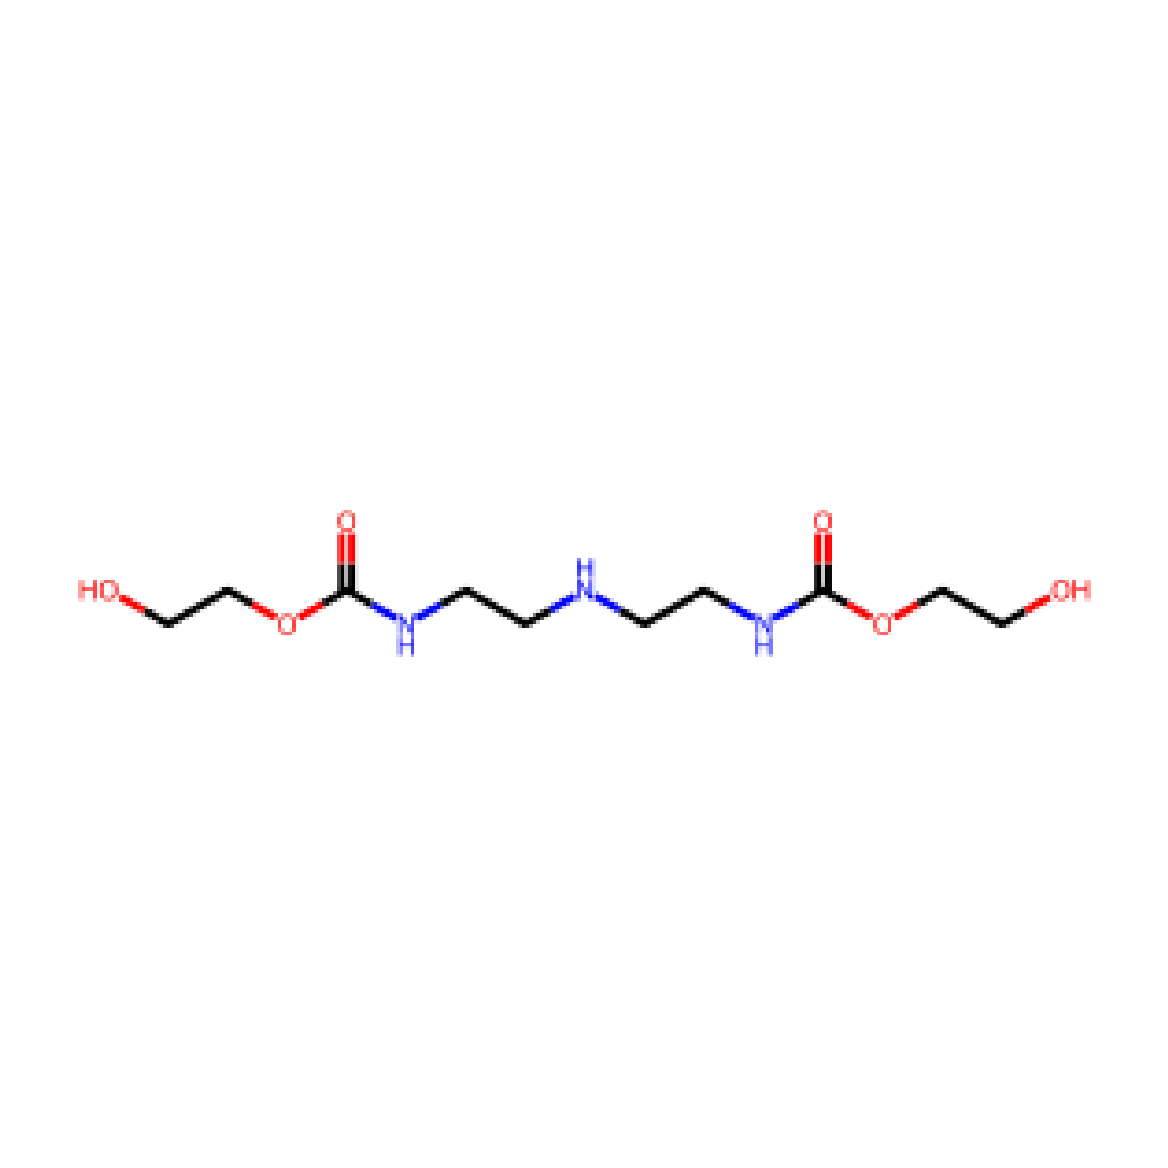

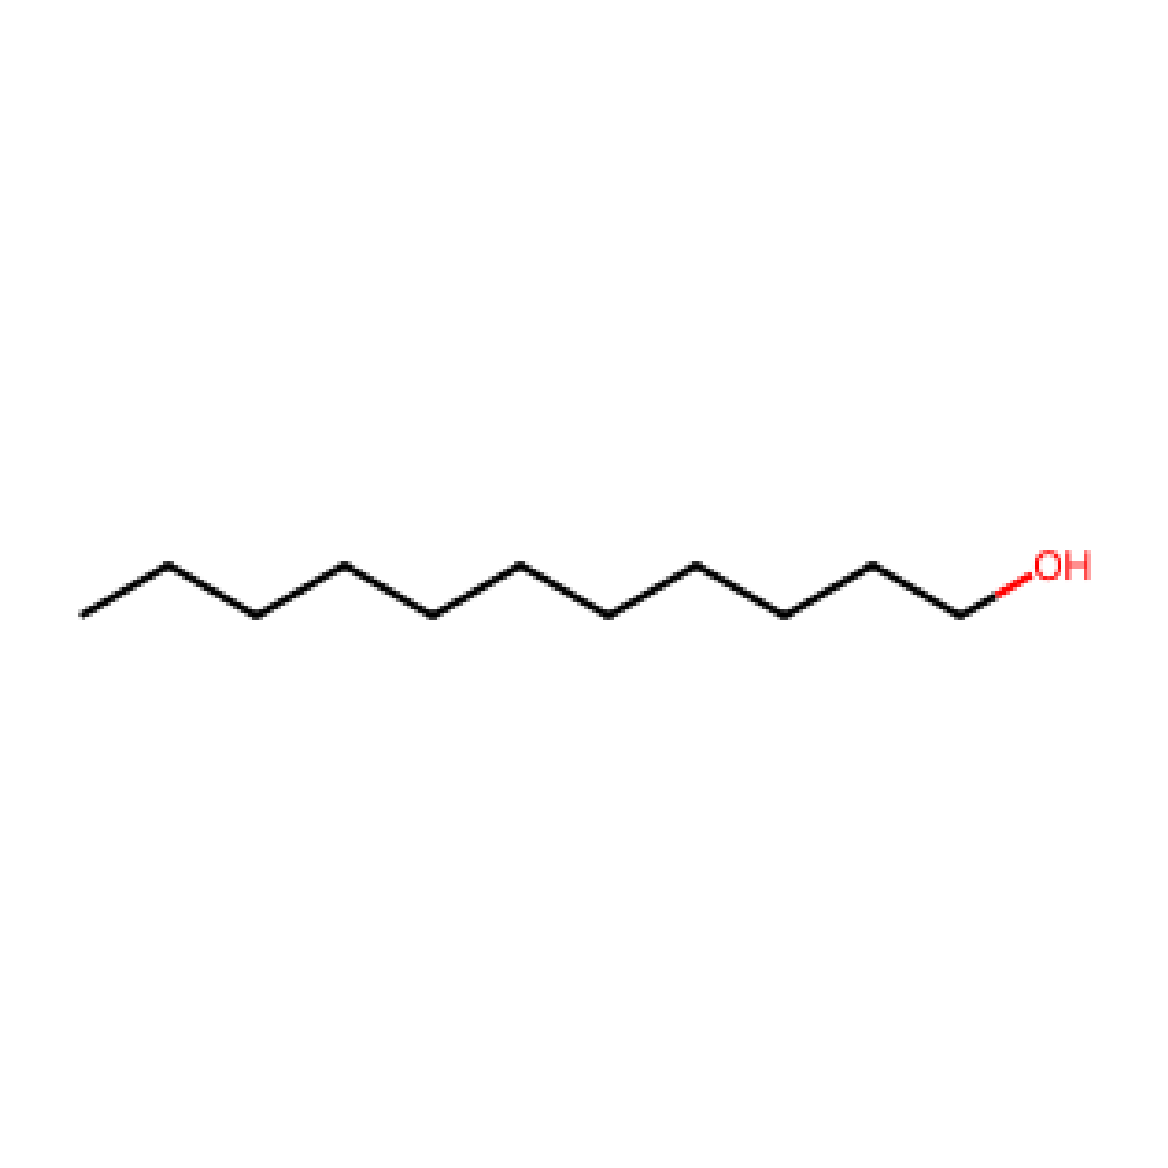

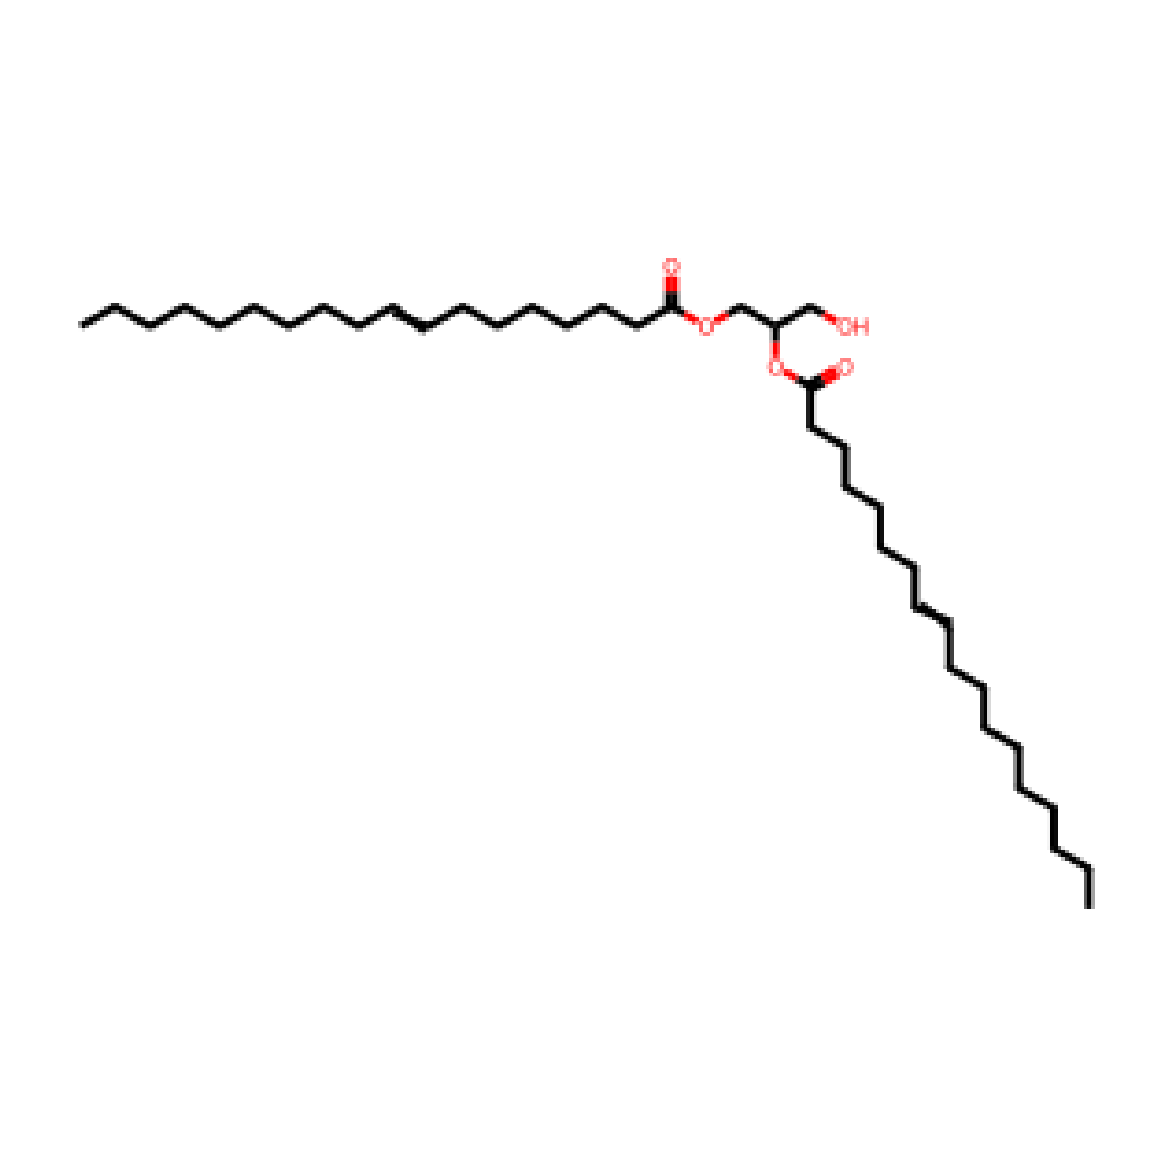

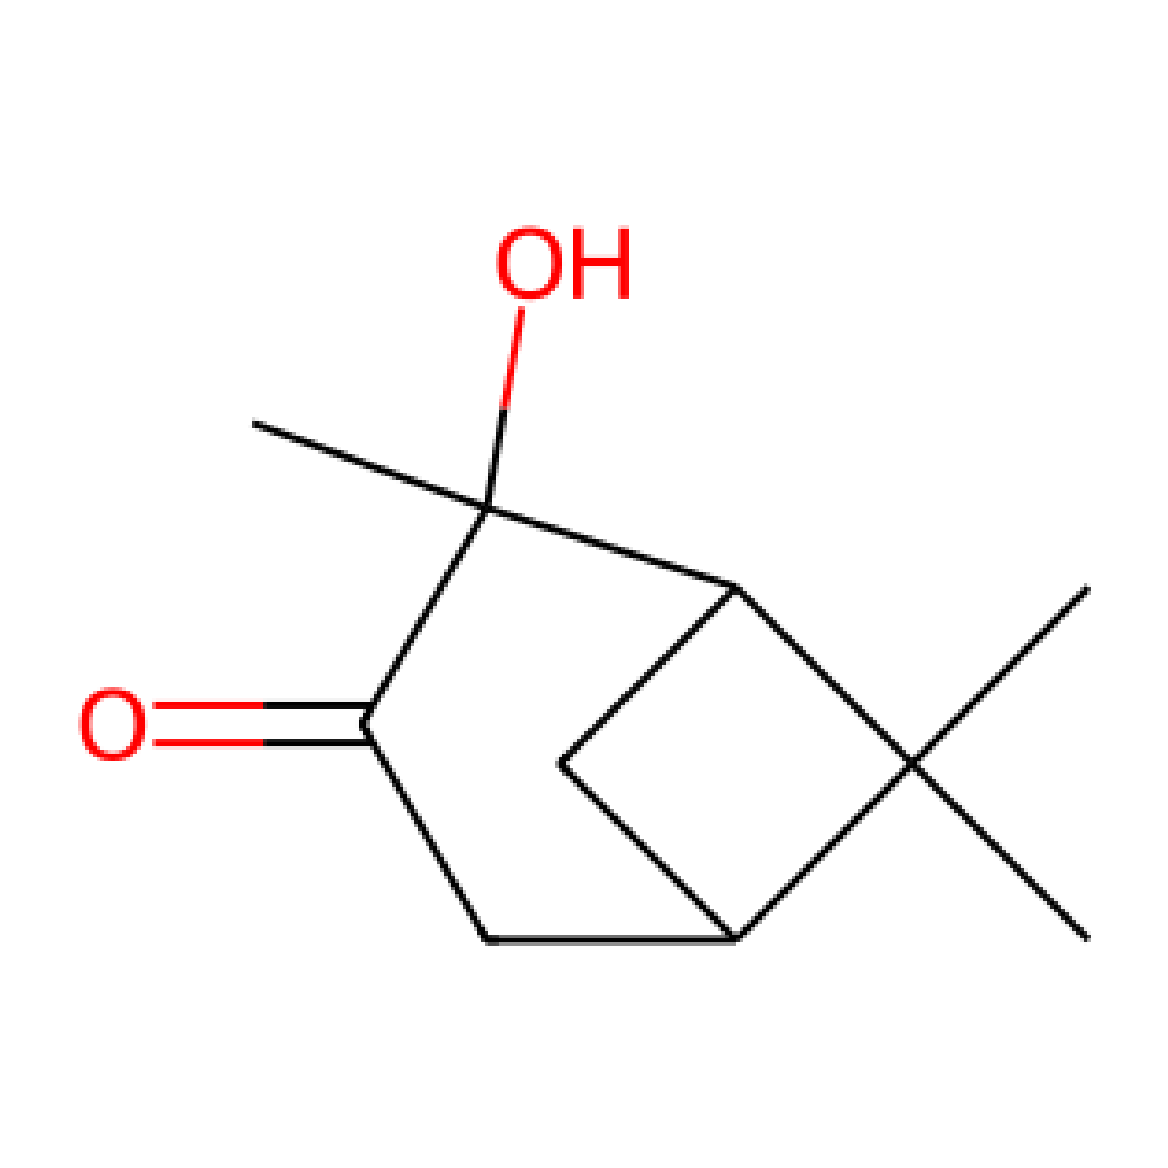

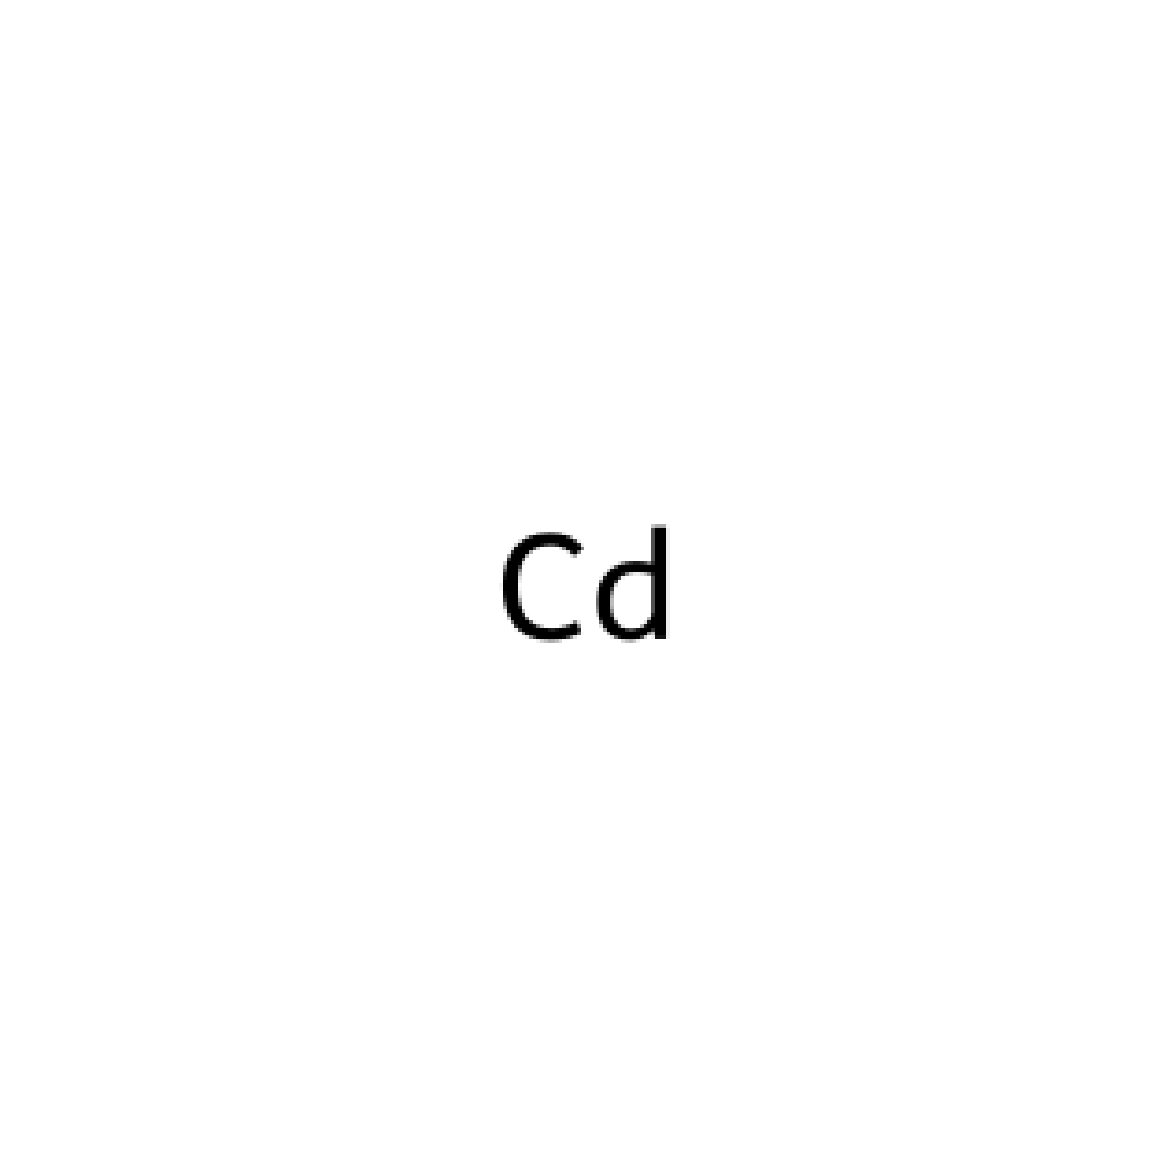

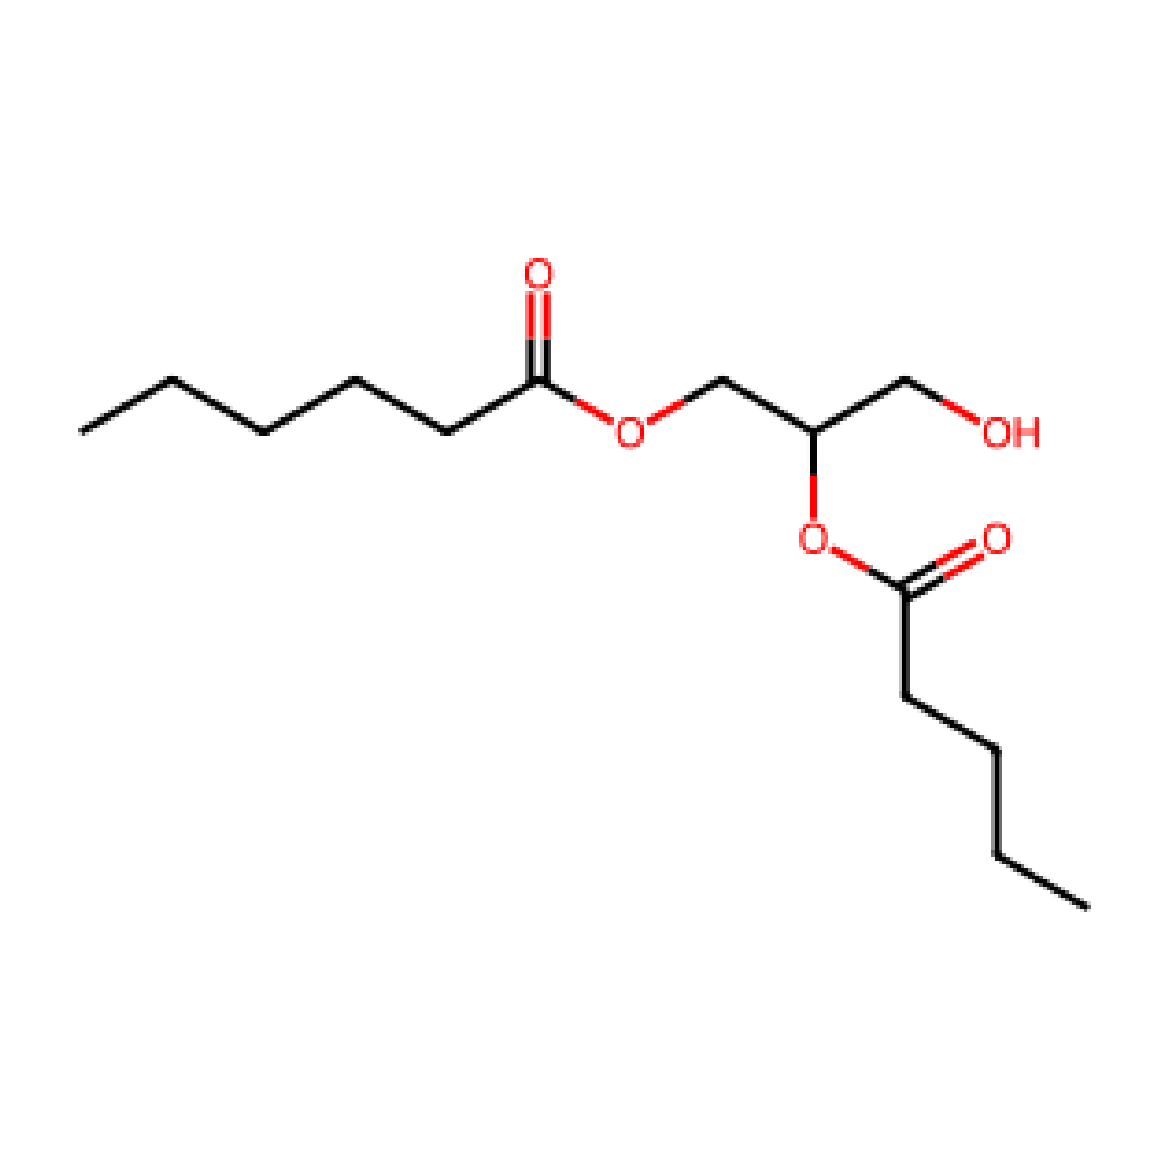

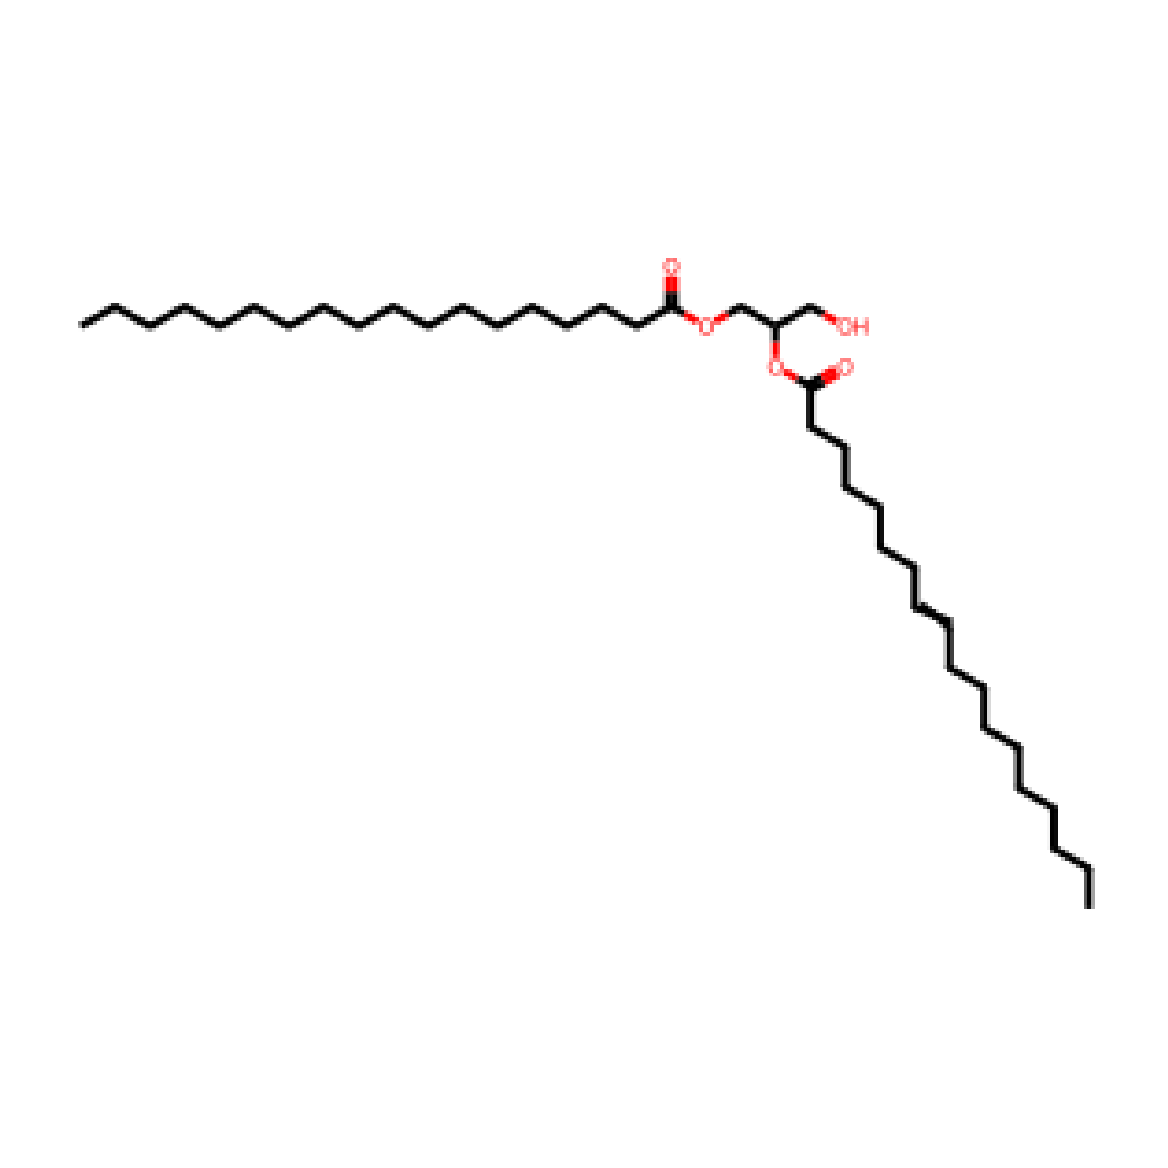

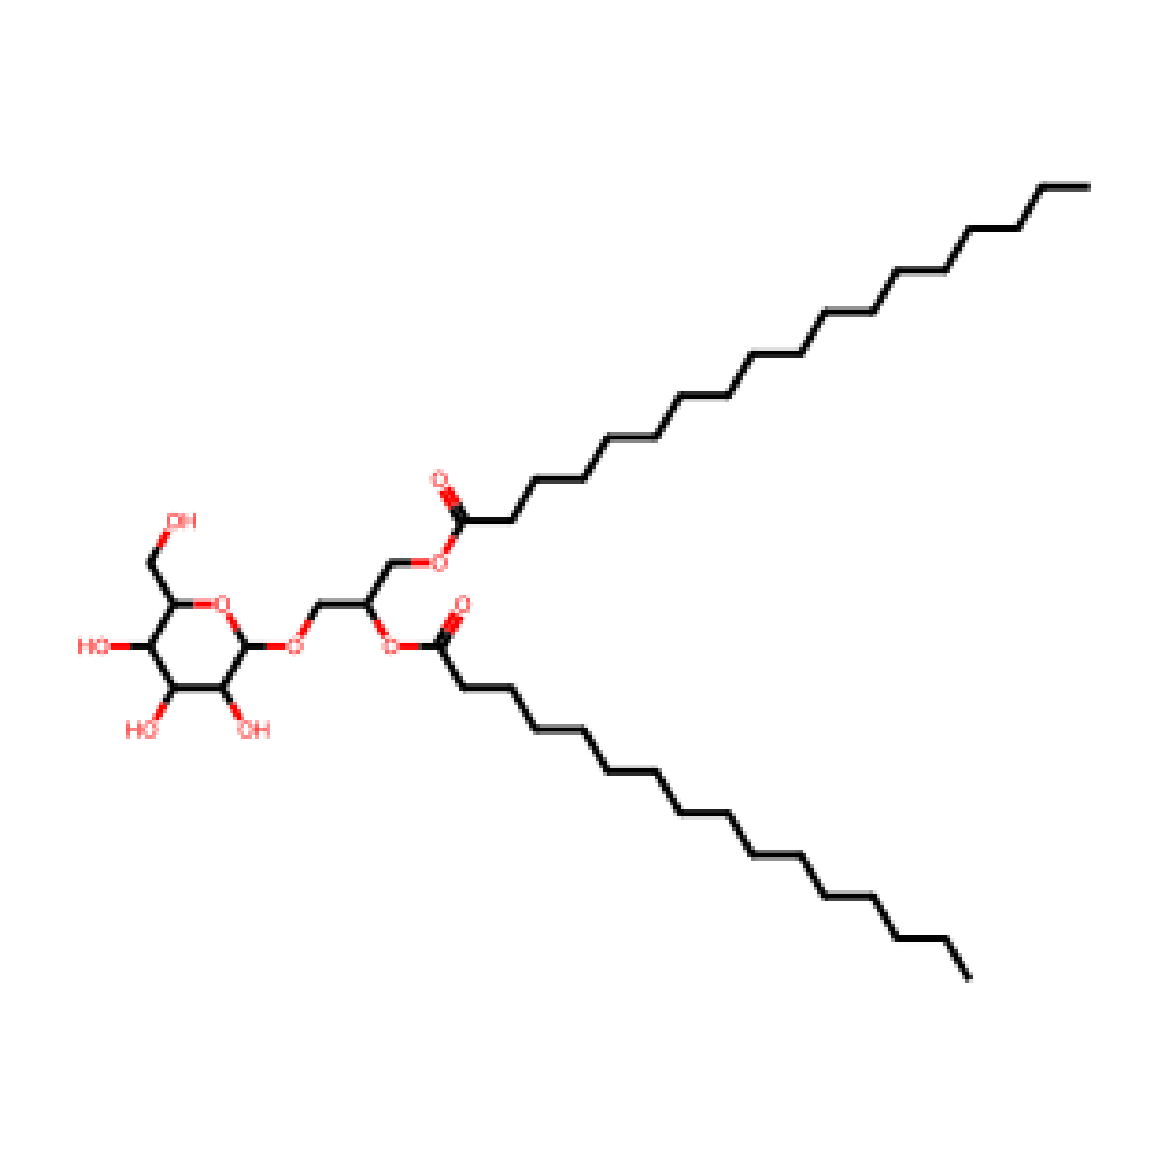

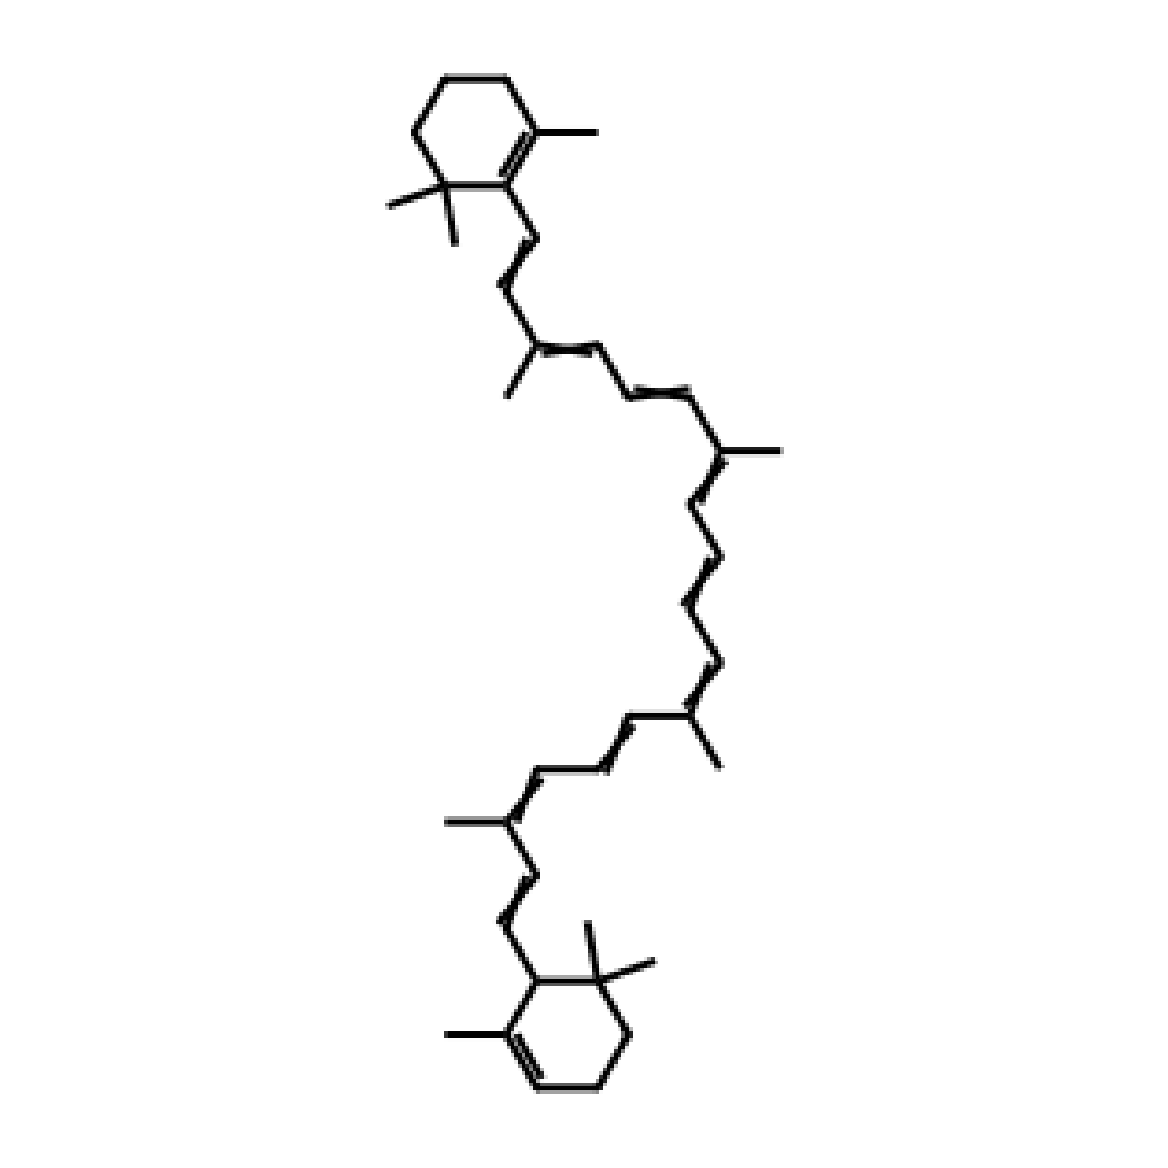

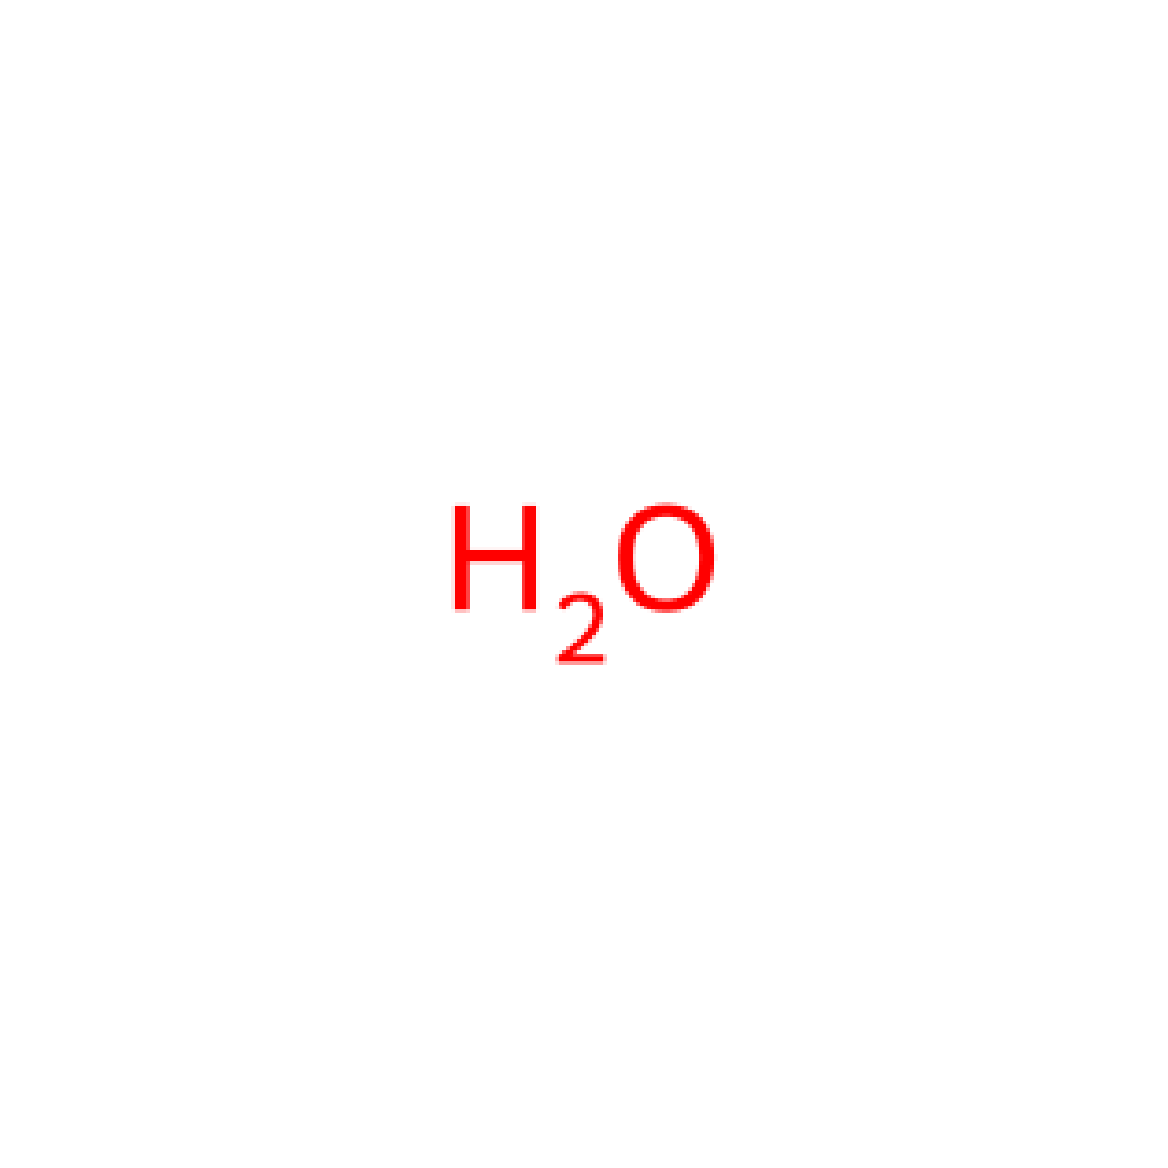

Todas las moléculas han sido guardadas en 'heteromolecules.sdf.pdf'


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import io
from PIL import Image

# Cargar la molécula desde un archivo SDF
sdf_file = 'heteromolecules.sdf'

# Crear un proveedor de moléculas a partir del archivo SDF
supplier = Chem.SDMolSupplier(sdf_file)

# Crear un archivo PDF para guardar las imágenes
with PdfPages('heteromolecules.sdf.pdf') as pdf:
    for mol in supplier:
        if mol is not None:
            # Crear un "dibujante" que maneje mejor la salida para PDF
            drawer = rdMolDraw2D.MolDraw2DCairo(300, 300)  # 300x300 es el tamaño de la imagen

            # Dibujar la molécula
            drawer.DrawMolecule(mol)
            drawer.FinishDrawing()

            # Convertir a un formato que matplotlib puede manejar y agregar al PDF
            # Obtener los datos de la imagen en formato binario
            image_data = drawer.GetDrawingText()
            image = Image.open(io.BytesIO(image_data))

            # Mostrar la imagen con matplotlib y guardarla en el PDF
            fig, ax = plt.subplots(dpi=300)
            ax.imshow(image, interpolation='none')
            ax.axis('off')  # Ocultar los ejes para una imagen más limpia

            # Mostrar la figura en la pantalla
            plt.show()

            # Guardar la figura actual en el PDF
            pdf.savefig(fig)
            plt.close(fig)

print("Todas las moléculas han sido guardadas en 'heteromolecules.sdf.pdf'")


In [ ]:
!jupyter nbconvert --to script '/content/drive/MyDrive/CLASES/UNIR/PYTHON/TRABAJOS/ACT2/actividad2.ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/CLASES/UNIR/PYTHON/TRABAJOS/ACT2/actividad2.ipynb to script
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('block_group', 'content_dependencies', 'outputs_reference' were unexpected)

Failed validating 'additionalProperties' in code_cell:

On instance['cells'][0]:
{'block_group': 'd5f21928ec7e4dcf822a3388b2375d78',
 'cell_type': 'code',
 'content_dependencies': {'codeHash': '7958d4a9',
                          'definedVariables': [],
                          'importedModules': [],
                          'usedVariables': []},
 'execution_count': 1,
 'metadata': {'cell_id': 'bef34aae7f7b4315bed78fdc503e73d0',
              'deepnote_app_block_visible': True,
              'deepnote_cell_type': 'code',
              'deepnote_to_be_reexecuted': False,
              'execution_millis': 3419,
              'execution_start': 1715902262696,
              'source_hash': '7958d4a9'},
 'outpu